In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
from analysis_routines import *
from plotting_routines_xr import *
from processing_routines import datenum_to_epoch
from wavelet_analysis import wavelet_power_spectrum
from harmonic_analysis import *
plt.style.use('/home/manu/TFG_repo/notebooks/mplstyles/notebook.mplstyle')

In [4]:
chain_fit = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
chain_data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
G005 = pd.read_csv(data_dir / 'SHDR_fit/aux/G05.csv', index_col='date', parse_dates=True)
ds_buoy = load_buoy_series('AGL_ocean_meteo_20181116.nc')

In [45]:
coriolis_freq = 2*7.2921e-5*np.sin(np.deg2rad(chain_data.lat.data)[0])
coriolis_freq_cps = coriolis_freq/2/np.pi
coriolis_freq_cpd = coriolis_freq_cps*60*60*24

In [46]:
class bandpass_column:
    
    def compute(self, data_chain):
        for depth in data_chain.depth.data:
            temp =data_chain.temp.sel(depth=depth)
            if depth == 48:
                interval = 1/10/60
            elif depth == 201:
                interval = 1/5/60
            else:
                interval = 1/5
            bandpass = bandpass_filter(temp, chain_data.date, 
                                           interval, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)
            
            setattr(self, 'd' + str(depth), bandpass)


In [47]:
bandpas_col = bandpass_column()
bandpas_col.compute(chain_data)

In [43]:
def plot_bandpass_col(data_chain, instance):
    gs = plt.GridSPec(2, 7)
    fig = plt.figure()
    for depth in data_chain.depth.data:
        series = getattr(instance, 'd' + str(depth))
        ax.plot(series)
    

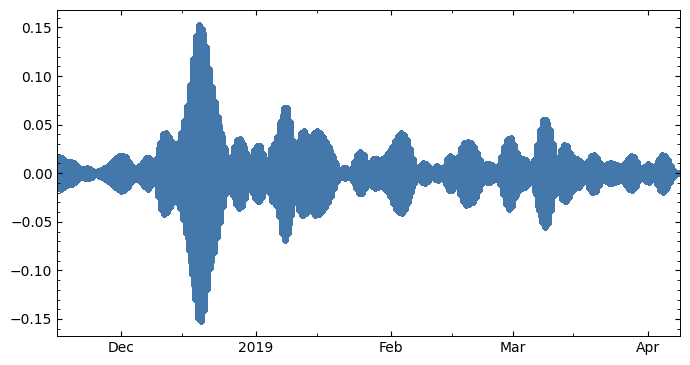

In [54]:
plot_arbitrary_variable(bandpas_col.d126, type='plot')

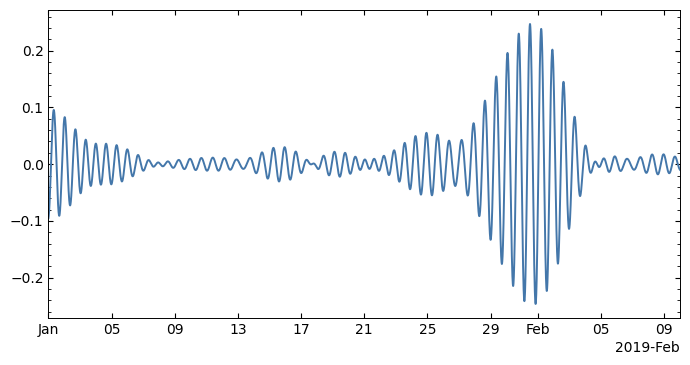

In [59]:
plot_arbitrary_variable(bandpas_col.d176, period=[datetime(2019, 1, 1), datetime(2019, 2, 10)], type='plot')

In [42]:
chain_data.depth.data

array([  1,   8,  23,  28,  33,  43,  48,  53,  63,  78,  96, 108, 126,
       151, 176, 201], dtype=int32)

In [6]:
D1_inertial_bandpass = bandpass_filter(chain_fit.D1, chain_data.date, 1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

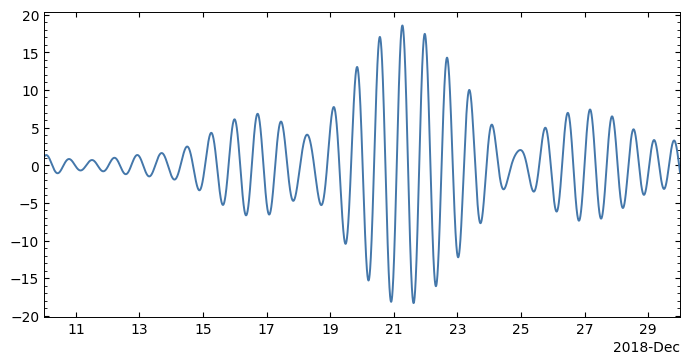

In [60]:
plot_arbitrary_variable(D1_inertial_bandpass, type='plot', period=[datetime(2018, 12, 10), datetime(2018, 12, 30)])

In [ ]:
plot_fit_variable()

In [8]:
plot_arbitrary_variable(G005_intertial_bandpass**2, type='plot', period=[None, datetime(2019, 2, 12)])

NameError: name 'G005_intertial_bandpass' is not defined

In [9]:
temp_8_inertial_bandpass = bandpass_filter(chain_data.temp[:, 8].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)
temp_7_inertial_bandpass = bandpass_filter(chain_data.temp[:, 7].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

temp_15_inertial_bandpass = bandpass_filter(chain_data.temp[:, 15].data, chain_data.date, 
                                           1/300, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

temp_9_inertial_bandpass = bandpass_filter(chain_data.temp[:, 9].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)


temp_14_inertial_bandpass = bandpass_filter(chain_data.temp[:, 14].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

G005_intertial_bandpass = bandpass_filter(G005.x, chain_data.date, 1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)


In [10]:
temp_9_inertial_bandpass = bandpass_filter(chain_data.temp[:, 9].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

In [ ]:
plot_arbitrary_variable(temp_8_inertial_bandpass, type='plot', period=[datetime(2018, 11, 22), datetime(2019, 1, 1)])

In [53]:
chain_data.depth

<xarray.DataArray 'depth' (depth: 16)>
array([  1,   8,  23,  28,  33,  43,  48,  53,  63,  78,  96, 108, 126, 151,
       176, 201], dtype=int32)
Coordinates:
  * depth    (depth) int32 1 8 23 28 33 43 48 53 63 78 96 108 126 151 176 201

In [49]:
chain_data.depth[12]

<xarray.DataArray 'depth' ()>
array(126, dtype=int32)
Coordinates:
    depth    int32 126

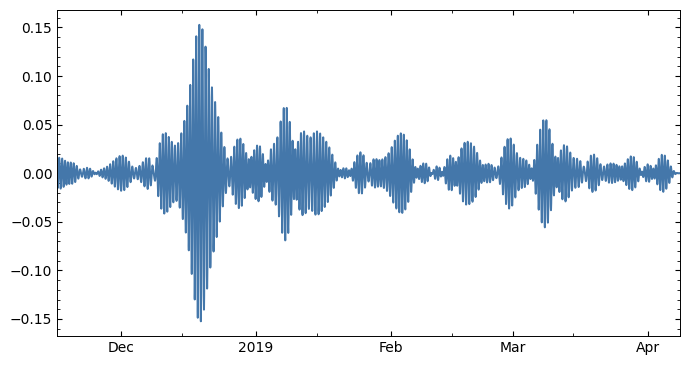

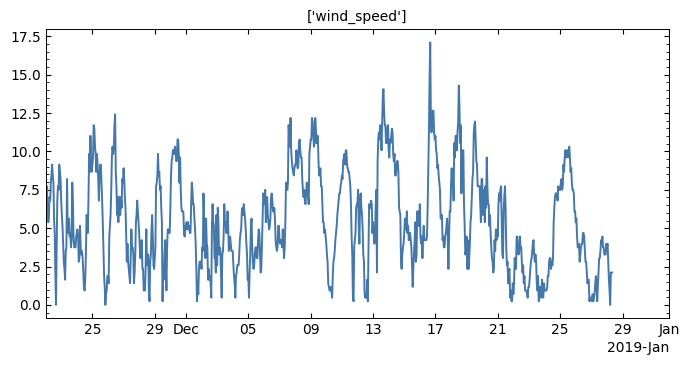

In [52]:
plot_arbitrary_variable(temp_12_inertial_bandpass, type='plot')
plot_AGL_data(ds_buoy,  ['wind_speed'],  period=[datetime(2018, 11, 22), datetime(2019, 1, 1)])

In [ ]:
plot_thermistor_temperature(chain_data,12, period=[datetime(2018, 11, 22), datetime(2019, 1, 1)])

In [51]:
temp_12_inertial_bandpass = bandpass_filter(chain_data.temp[:, 12].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

In [ ]:
plot_AGL_data(ds_buoy,  ['wind_speed'],  period=[datetime(2018, 11, 22), datetime(2019, 1, 1)])